## Задача 1

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### 1.1. Скачать данные в закрепе к уроку

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

In [4]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

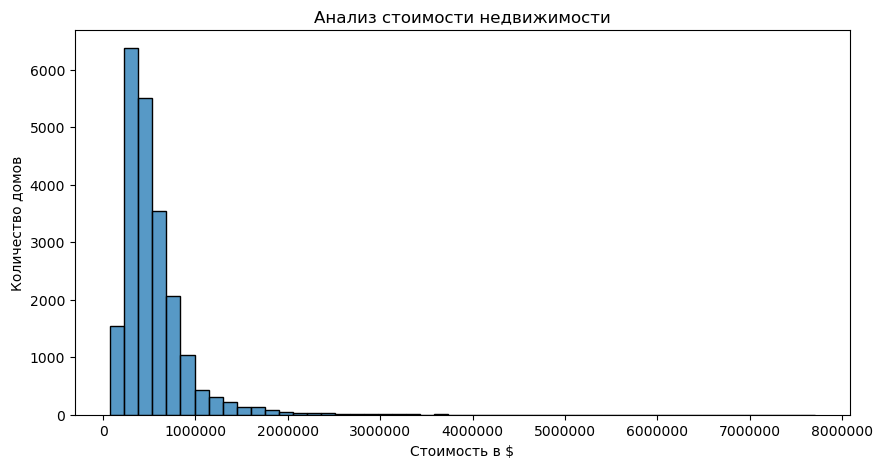

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50)
plt.ticklabel_format(style='plain')
plt.title('Анализ стоимости недвижимости')
plt.xlabel('Стоимость в $')
plt.ylabel('Количество домов');

Основное количество домов стоят до 1 000 000$. 

Наибольшее  количество (примерно 6,5 тыс.) домов стоят в районе 400 000 - 500 000$.

### 1.3 Изучите распределение квадратуры жилой площади

In [6]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

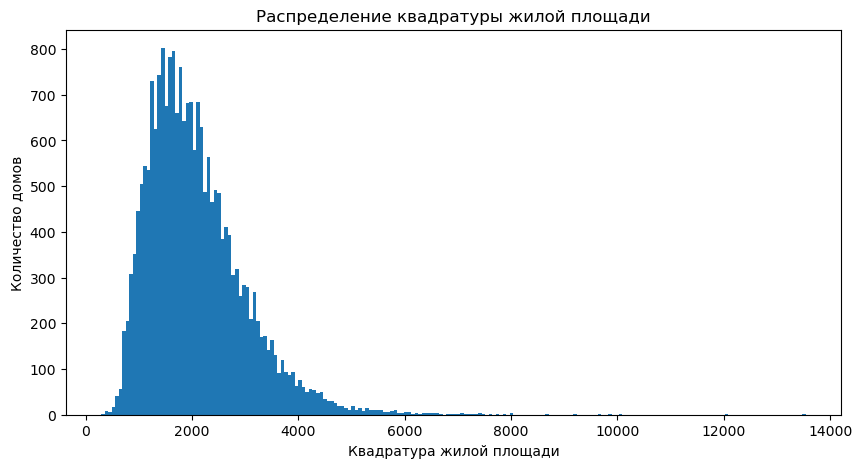

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df['sqft_living'], bins=200)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Количество домов');

В основной массе домов квадратура жилой площади составляет от 1000 до 3000 кв.м. 

Наибольшее количество домов с квадратурой примерно 1500 кв.м.

Имеются выбросы начиная с 6000 кв.м.


### 1.4 Изучите распределение года постройки

In [8]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

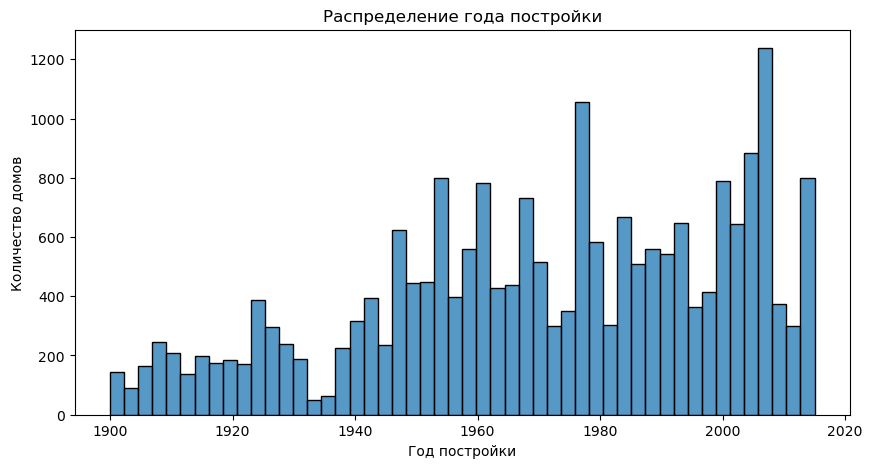

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['yr_built'], bins=50)
plt.ticklabel_format(style='plain')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Первый дом построен в 1900 г. Последний дом - в 2017/2018 г. Большая часть домов построена после 1945 г.

## Задача 2

Постройте график

Сделайте выводы

### 2.1 Изучите распределение домов от наличия вида на набережную

In [10]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

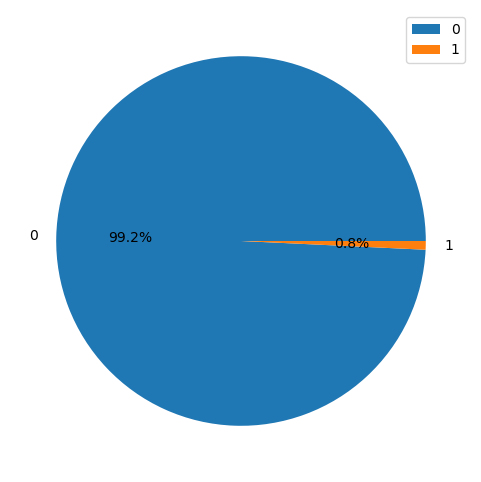

In [11]:
plt.figure(figsize=(6,6))
plt.pie(data.values, autopct='%1.1f%%', labels=data.index)
plt.legend(data.index);

Всего лишь 0,8% домов с видом на набережную.

### 2.2 Изучите распределение этажей домов

In [12]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

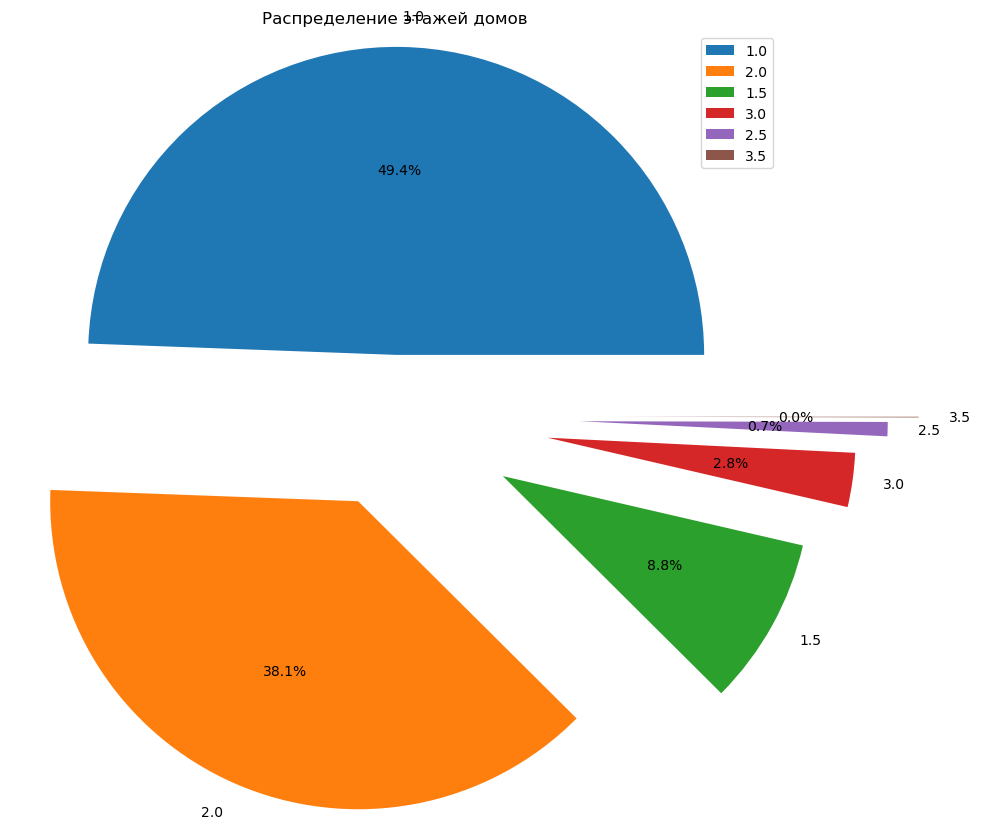

In [13]:
plt.figure(figsize=(10, 10))
expl = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=expl)
plt.title('Распределение этажей домов')
plt.legend(data.index, loc='best');

Почти половина домов имеют 1 этаж. 38,1% домов с 2-мя этажами. 

### 2.2 Изучите распределение состояния домов

In [14]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

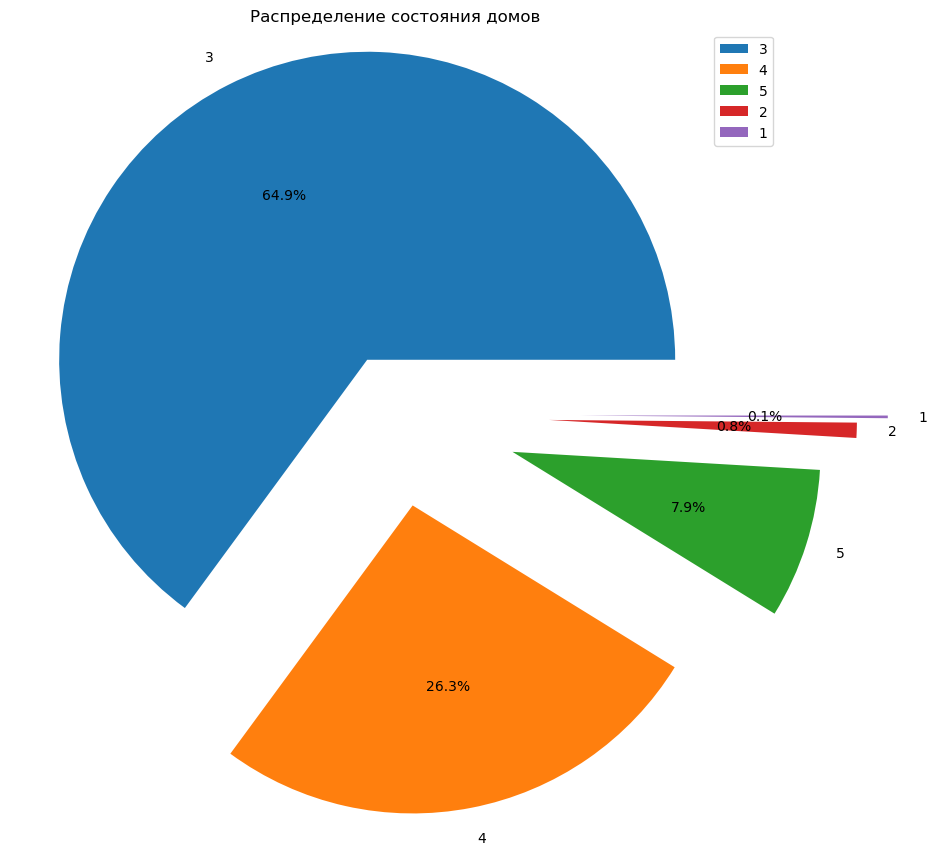

In [15]:
plt.figure(figsize=(10, 10))
expl = [0.2, 0.3, 0.4, 0.5, 0.6]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=expl)
plt.title('Распределение состояния домов')
plt.legend(data.index, loc='best');

Большая часть домов в удовлетворительном состоянии

### Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [16]:
corr_matrix = df.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [17]:
corr_matrix = np.round(corr_matrix, 2)
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


Из матрицы корреляций видно, что на стоимость недвижимости сильнее всего влияет квадратура жилой площади, оценка дома, квадратура кроме подвала, количество ванных комнат, состояние в целом.

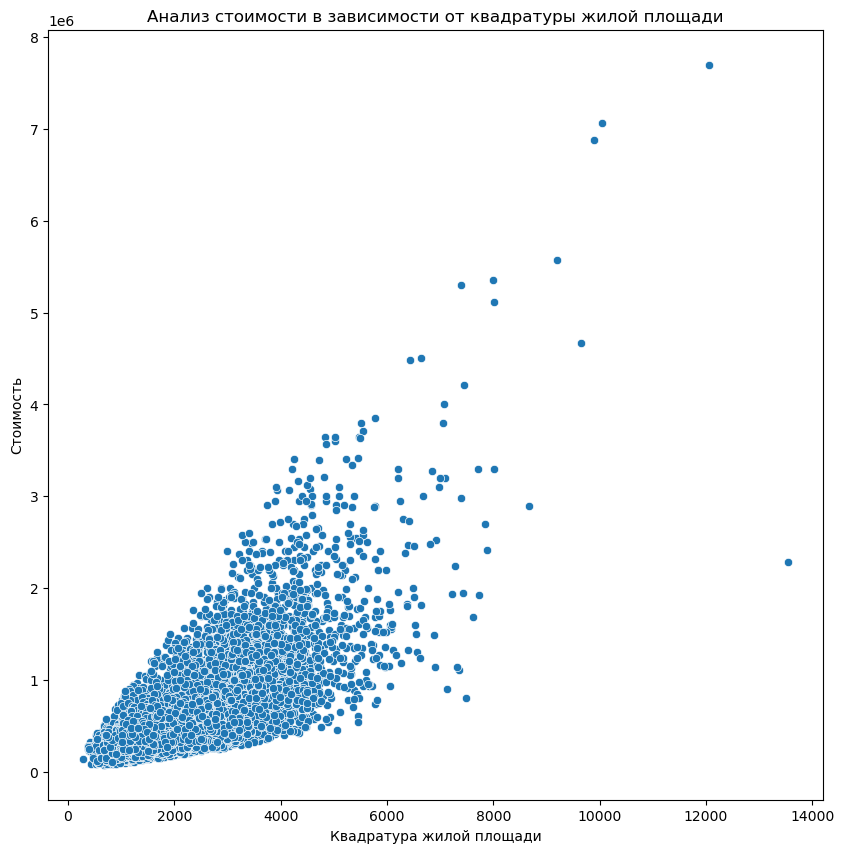

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('Анализ стоимости в зависимости от квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Стоимость');

Стоимость дома имеет прямую линейную связь с квадратурой жилой площади. Чем больше жилая площадь, тем выше цена. Но также можем заметить, что дома с одинаковой жилой площадью имеют разную стоимость. Из чего можем сделать вывод, что на стоимость влияет не только размер жилой площади.

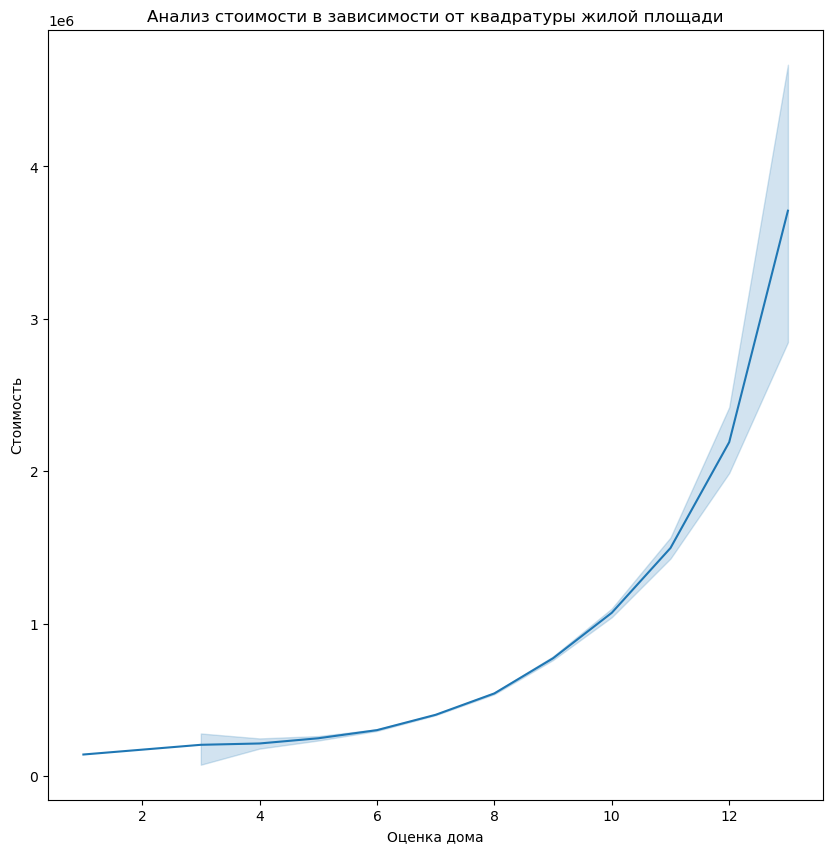

In [19]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['grade'], y=df['price'])
plt.title('Анализ стоимости в зависимости от квадратуры жилой площади')
plt.xlabel('Оценка дома')
plt.ylabel('Стоимость');

Чем выше оценка дома, тем выше стоимость. От 1 до 6 разница в стоимости незначительная. От 6 до 10 - ощутимая. От 10 до 12 - сильная.

<Figure size 1000x1000 with 0 Axes>

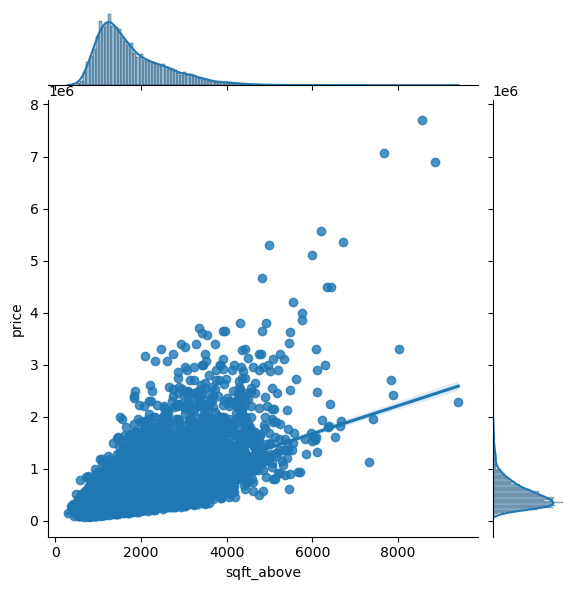

In [20]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='reg');

Чем больше квадратура, кроме подвала, тем выше стоимость дома

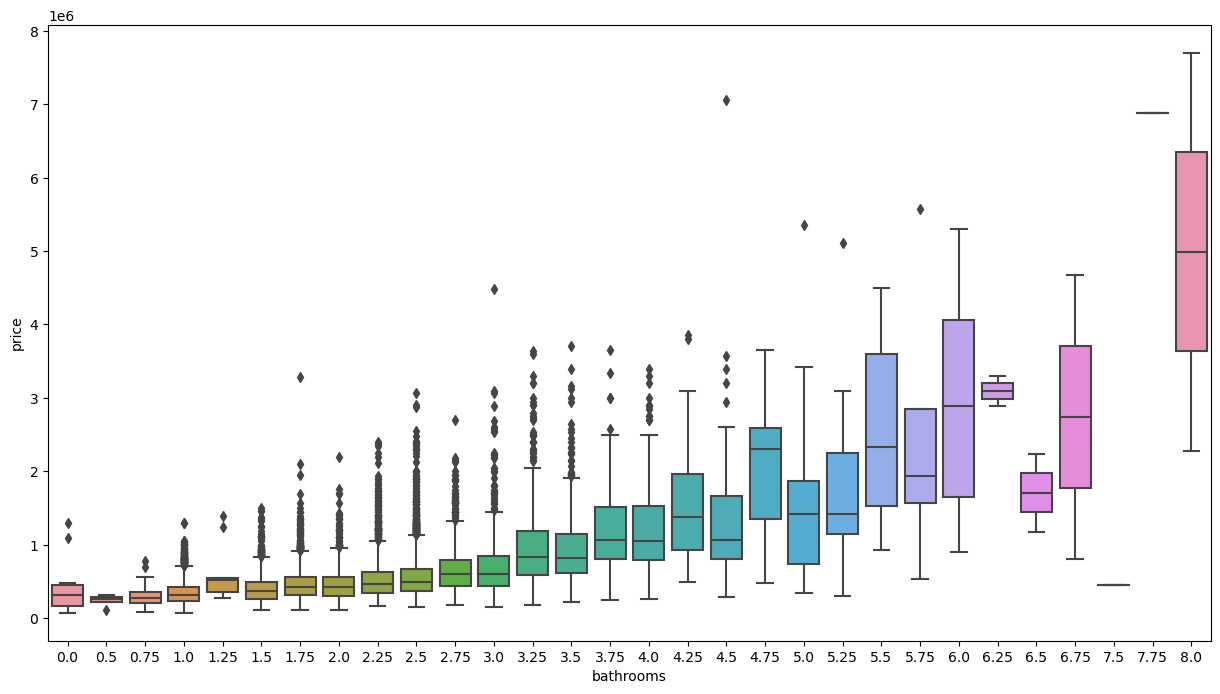

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['bathrooms'], y=df['price']);

Чем больше ванных комнат, тем стоимость дома дороже. Самый дорогой дом имеет 8 ванных комнат. 

<Figure size 1500x800 with 0 Axes>

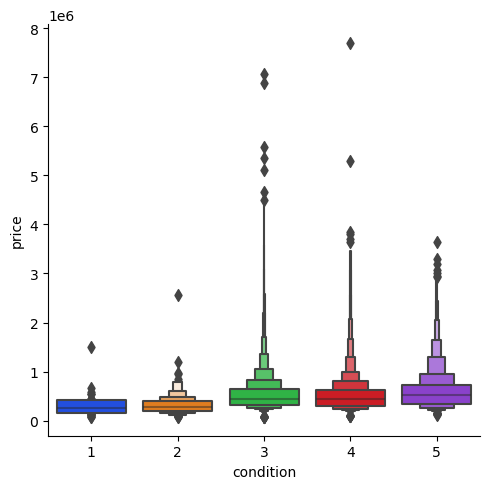

In [22]:
plt.figure(figsize=(15,8))
sns.catplot(x='condition', y='price', data=df, palette='bright', kind='boxen');

Стоимость домов, у которых состояние от 1 до 2 и от 3 до 5 не имеет сильных отличий. Самая высокая цена наблюдается у домов с средним состоянием. 